In [2]:
import sys
sys.path.append('/home/greg/GitHub/')
import datalog.iodat as iod
import datalog.plotlib as plib
import ecoflux.soil_gas_profile as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

%matplotlib inline

Loading datalog configuration file /home/greg/data/current/MojaveCarbon/datalog_config/datalog_conf.yaml
Configuration for project MojaveCarbon
Using configuration files in /home/greg/data/current/MojaveCarbon/datalog_config
Each site has 4 data directories available: 
 rawdata_incoming, rawdata_backup, rawdata_standardized, quality_assured 
Use "iodat.site_datadir(sitename, datadir=datadir_name)"to get proper path


## Load profile and met data

In [3]:
site = 'Creosote'
datadir = iod.site_datadir(site, 'quality_assured')
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='soilCO2')
dfc = iod.datalog_in(datadir + filen)
dfc = dfc[dfc.index>"2018-01-22"]
# Get list of qamasked files and return the most recent one
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='masked')
dfc2 = iod.datalog_in(datadir + filen)

site = 'JTree'
datadir = iod.site_datadir(site, 'quality_assured')
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='soilCO2')
dfj = iod.datalog_in(datadir + filen)
dfj = dfj[dfj.index>"2018-01-22"]
# Get list of qamasked files and return the most recent one
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='masked')
dfj2 = iod.datalog_in(datadir + filen)

site = 'PJ'
datadir = iod.site_datadir(site, 'quality_assured')
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='soilCO2')
dfpj = iod.datalog_in(datadir + filen)
dfpj = dfpj[dfpj.index>"2018-01-22"]
# Get list of qamasked files and return the most recent one
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='masked')
dfpj2 = iod.datalog_in(datadir + filen)

site = 'Q6'
datadir = iod.site_datadir(site, 'quality_assured')
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='soilCO2')
dfq6 = iod.datalog_in(datadir + filen)
dfq6 = dfq6[dfq6.index>"2018-01-22"]
# Get list of qamasked files and return the most recent one
filen, _ = iod.most_recent_filematch(site, datadir, ext='.txt', optmatch='masked')
dfq62 = iod.datalog_in(datadir + filen)

Opening /home/greg/GD_berkeley/MojaveCarbon/Data/MNP_station_data/Creosote/qa/Creosote_2018_02_20_17_08_soilCO2flux.txt
---file metadata---
location: Creosote
date generated: 2018-02-28 21:21:57.886821
writer: datalog.iodat.datalog_out
writer HEAD SHA: b6dec7f8b9c8ca3594d872c904c7dad5a4ef4425
called from: /home/greg/data/current/MojaveCarbon/dataQA/calc_fluxes_site.py
-------------------
Opening /home/greg/GD_berkeley/MojaveCarbon/Data/MNP_station_data/Creosote/qa/Creosote_2018_02_20_17_08_qamasked.txt
---file metadata---
location: Creosote
date generated: 2018-02-28 21:20:41.935973
writer: datalog.iodat.datalog_out
writer HEAD SHA: b6dec7f8b9c8ca3594d872c904c7dad5a4ef4425
called from: /home/greg/data/current/MojaveCarbon/dataQA/qa_site.py
-------------------
Opening /home/greg/GD_berkeley/MojaveCarbon/Data/MNP_station_data/JTree/qa/JTree_2018_02_20_17_55_soilCO2flux.txt
---file metadata---
location: JTree
date generated: 2018-02-28 21:21:59.261670
writer: datalog.iodat.datalog_out
wri

## Load eosFD data files

,Flux,Temperature (C),CO2 Soil (ppm),CO2 Soil STD (ppm),CO2 ATM (ppm),CO2 ATM STD (ppm),Mode
dt,,,,,,,
2018-02-20 18:03:12,0.28,16.0,250.49,34.876,234.44,38.610,0
2018-02-20 18:33:10,0.17,14.3,265.21,36.867,255.55,33.358,0
2018-02-20 19:03:11,-0.08,12.8,271.96,42.508,276.38,23.159,0
2018-02-20 19:33:11,0.20,11.4,283.29,42.819,271.63,26.127,0
2018-02-20 19:35:48,-0.00,-0.0,-0.00,-0.000,-0.00,-0.000,2


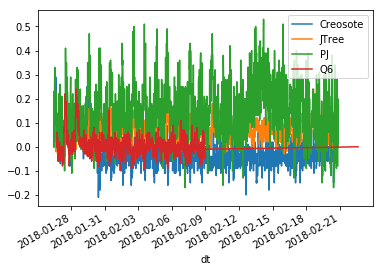

In [4]:
# Load the eosFD data
datadir = '/home/greg/Dropbox/MojaveCarbonData/eosFD/'
cFDdat = pd.read_csv(datadir + 'FD_20170003_2018-02-20_17-03-45.csv', parse_dates={'dt': [0,1,2,3]})
jFDdat = pd.read_csv(datadir + 'FD_20170005_2018-02-20_17-52-15.csv', parse_dates={'dt': [0,1,2,3]})
pjFDdat = pd.read_csv(datadir + 'FD_20170006_2018-02-20_19-33-39.csv', parse_dates={'dt': [0,1,2,3]})
q6FDdat = pd.read_csv(datadir + 'FD_20170004_2018-02-22_15-00-36.csv', parse_dates={'dt': [0,1,2,3]})
cFDdat = cFDdat.set_index('dt')
jFDdat = jFDdat.set_index('dt')
pjFDdat = pjFDdat.set_index('dt')
q6FDdat = q6FDdat.set_index('dt')
# Makle a simple plot
cFDdat.Flux.plot()
jFDdat.Flux.plot()
pjFDdat.Flux.plot()
q6FDdat.Flux.plot()
plt.legend(['Creosote', 'JTree', 'PJ', 'Q6'])
pjFDdat.tail()
#jFDdat.head()

## Raw data

Text(0.5,0.98,'Raw data')

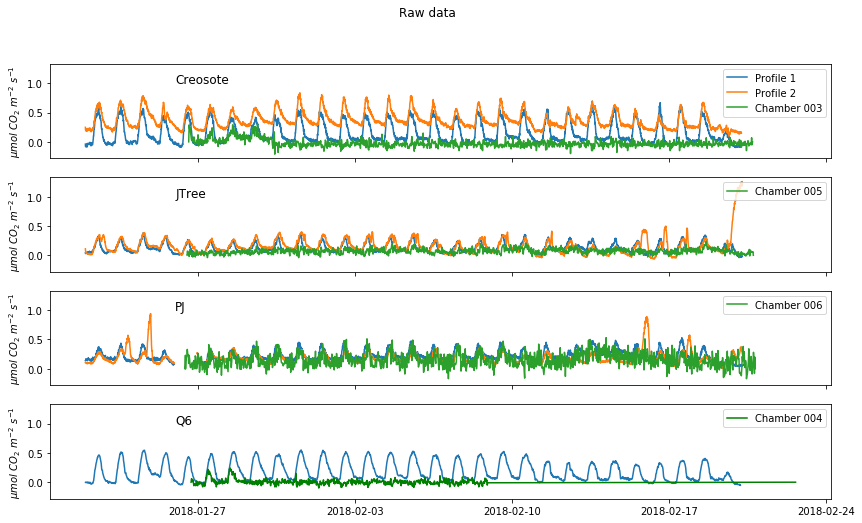

In [5]:

text_x = cFDdat.index[1].toordinal()
fig1, ax1 = plt.subplots(4, sharex=True, sharey=True, figsize=(14, 8))
ax1[0].plot(dfc.index, dfc.CO2flux_1_surf, label='Profile 1')
ax1[0].plot(dfc.index, dfc.CO2flux_2_surf, label='Profile 2')
ax1[0].plot(cFDdat.index, cFDdat.Flux, label='Chamber 003')
ax1[0].legend()
ax1[0].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax1[0].text(text_x, 1.0, 'Creosote', fontsize=12)

ax1[1].plot(dfj.index, dfj.CO2flux_1_surf, label='')
ax1[1].plot(dfj.index, dfj.CO2flux_2_surf, label='')
ax1[1].plot(jFDdat.index, jFDdat.Flux, label='Chamber 005')
ax1[1].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax1[1].legend(loc='upper right')
ax1[1].text(text_x, 1.0, 'JTree', fontsize=12)

ax1[2].plot(dfpj.index, dfpj.CO2flux_1_surf, label='')
ax1[2].plot(dfpj.index, dfpj.CO2flux_2_surf, label='')
ax1[2].plot(pjFDdat.index, pjFDdat.Flux, label='Chamber 006')
ax1[2].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax1[2].legend()
ax1[2].text(text_x, 1.0, 'PJ', fontsize=12)

test = np.isfinite(dfq6.CO2flux_1_surf)
ax1[3].plot(dfq6.index[test], dfq6.CO2flux_1_surf[test], label='')
ax1[3].plot(q6FDdat.index, q6FDdat.Flux, label='Chamber 004', color='green')
ax1[3].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax1[3].legend()
ax1[3].text(text_x, 1.0, 'Q6', fontsize=12)

plt.suptitle('Raw data')


## Cleaned data

Creosote eosFD chamber was leaning over and not really embedded in the soil when I retrieved it. It looked like something pulled on one of the guylines I had stabilized with but it was still partially held up by the other two. From the data it looks like this occurred around Jan 30.

The Q6 chamber was the one dragged off and chewed up. It seems that the chamber was pulled over around Jan 29th, but then kept running and didn't measure any reliable fluxes. The cord may have been finally chewed through later (when data actually end).

In [6]:
# Remove the suspect creosote and Q6 data
cFDdat = cFDdat[cFDdat.index < '2018-01-30 08:00:00']
q6FDdat = q6FDdat[q6FDdat.index < '2018-01-29 08:00:00']

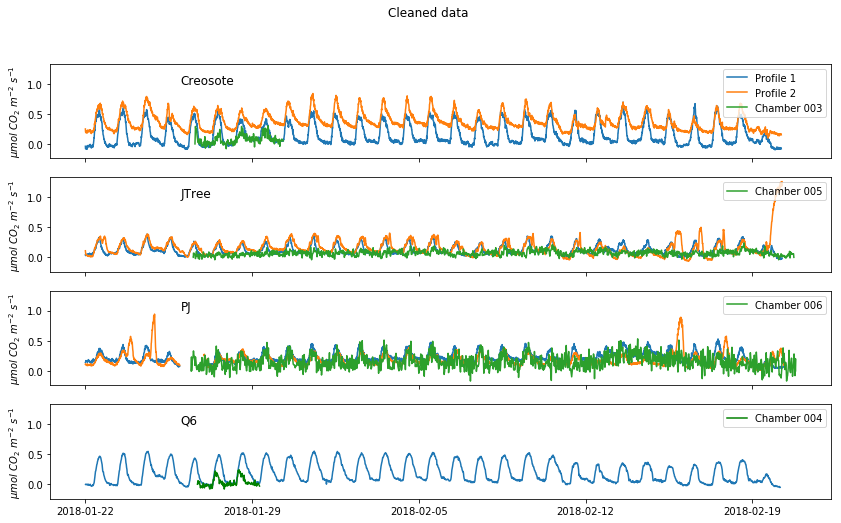

In [7]:

text_x = cFDdat.index[1].toordinal()
fig2, ax2 = plt.subplots(4, sharex=True, sharey=True, figsize=(14, 8))
ax2[0].plot(dfc.index, dfc.CO2flux_1_surf, label='Profile 1')
ax2[0].plot(dfc.index, dfc.CO2flux_2_surf, label='Profile 2')
ax2[0].plot(cFDdat.index, cFDdat.Flux, label='Chamber 003')
ax2[0].legend()
ax2[0].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax2[0].text(text_x, 1.0, 'Creosote', fontsize=12)

ax2[1].plot(dfj.index, dfj.CO2flux_1_surf, label='')
ax2[1].plot(dfj.index, dfj.CO2flux_2_surf, label='')
ax2[1].plot(jFDdat.index, jFDdat.Flux, label='Chamber 005')
ax2[1].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax2[1].legend(loc='upper right')
ax2[1].text(text_x, 1.0, 'JTree', fontsize=12)

ax2[2].plot(dfpj.index, dfpj.CO2flux_1_surf, label='')
ax2[2].plot(dfpj.index, dfpj.CO2flux_2_surf, label='')
ax2[2].plot(pjFDdat.index, pjFDdat.Flux, label='Chamber 006')
ax2[2].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax2[2].legend()
ax2[2].text(text_x, 1.0, 'PJ', fontsize=12)

test = np.isfinite(dfq6.CO2flux_1_surf)
ax2[3].plot(dfq6.index[test], dfq6.CO2flux_1_surf[test], label='')
ax2[3].plot(q6FDdat.index, q6FDdat.Flux, label='Chamber 004', color='green')
ax2[3].set_ylabel('$\mu mol\ CO_2\ m^{-2}\ s^{-1}$')
ax2[3].legend()
ax2[3].text(text_x, 1.0, 'Q6', fontsize=12)

plt.suptitle('Cleaned data')

out = '/home/greg/current/MojaveCarbon/figures/'
fig1.savefig(out + 'Mojave_eos_profile_raw.png', dpi=150)
fig2.savefig(out + 'Mojave_eos_profile.png', dpi=150)

## 1:1 plots

In general it looks like the chamber fluxes are lower, particularly during the daytime peaks. JTree profile and chamber fluxes are pretty weakly correlated.

In [32]:
# First round off times and merge profile and chamber data into one file
cFDdat_r = cFDdat.copy()
cFDdat_r.index = cFDdat.index.round(freq='30T')
c = pd.merge(dfc.loc[:,['CO2flux_1_surf', 'CO2flux_2_surf']], cFDdat_r, how='outer', left_index=True, right_index=True)
metvars = ['AirTC_Avg','Rain_mm_Tot','VWC_1_25', 'VWC_2_25', 'TS_1_25', 'TS_2_25']
c2 = pd.merge(c, dfc2.loc[:,metvars], how='inner', left_index=True, right_index=True)

jFDdat_r = jFDdat.copy()
jFDdat_r.index = jFDdat.index.round(freq='30T')
j = pd.merge(dfj.loc[:,['CO2flux_1_surf', 'CO2flux_2_surf']], jFDdat_r, how='outer', left_index=True, right_index=True)
j2 = pd.merge(j, dfj2.loc[:,metvars], how='inner', left_index=True, right_index=True)

pjFDdat_r = pjFDdat.copy()
pjFDdat_r.index = pjFDdat.index.round(freq='30T')
pj = pd.merge(dfpj.loc[:,['CO2flux_1_surf', 'CO2flux_2_surf']], pjFDdat_r, how='outer', left_index=True, right_index=True)
pj2 = pd.merge(pj, dfpj2.loc[:,metvars], how='inner', left_index=True, right_index=True)

q6FDdat_r = q6FDdat.copy()
q6FDdat_r.index = q6FDdat.index.round(freq='30T')
q6 = pd.merge(pd.DataFrame(dfq6.CO2flux_1_surf), q6FDdat_r, how='outer', left_index=True, right_index=True)
metvars = ['AirTC_Avg','Rain_mm_Tot','VWC_1_25', 'TS_1_25']
q62 = pd.merge(q6, dfq62.loc[:,metvars], how='inner', left_index=True, right_index=True)

c2.to_csv('~/Desktop/Creosote_eosmerge.csv')
j2.to_csv('~/Desktop/JTree_eosmerge.csv')
pj2.to_csv('~/Desktop/PJ_eosmerge.csv')
q62.to_csv('~/Desktop/Q6_eosmerge.csv')

In [29]:
q62

,CO2flux_1_surf,Flux,Temperature (C),CO2 Soil (ppm),CO2 Soil STD (ppm),CO2 ATM (ppm),CO2 ATM STD (ppm),Mode,AirTC_Avg,Rain_mm_Tot,VWC_1_25,TS_1_25
2018-01-22 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.572,0.0,0.041,10.70
2018-01-22 00:20:00,-0.001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.591,0.0,0.041,10.71
2018-01-22 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.450,0.0,0.041,10.65
2018-01-22 00:40:00,0.002362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.326,0.0,0.041,10.62
2018-01-22 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.197,0.0,0.041,10.57
2018-01-22 01:00:00,-0.005903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185,0.0,0.041,10.56
2018-01-22 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.335,0.0,0.041,10.55
2018-01-22 01:20:00,-0.005310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.546,0.0,0.041,10.50
2018-01-22 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.527,0.0,0.041,10.47
2018-01-22 01:40:00,-0.004129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.139,0.0,0.041,10.45


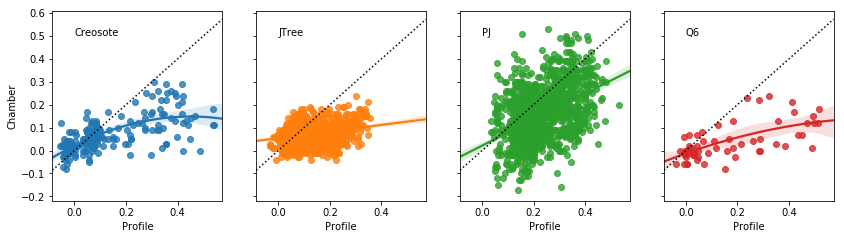

In [193]:
import seaborn as sns
def abline(ax, slope, intercept):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, ':k')

fig3, ax3 = plt.subplots(1,4, sharex=True, sharey=True, figsize=(14, 3.5))
sns.regplot(x=c.CO2flux_1_surf, y=c.Flux, ax=ax3[0], order=2)
abline(ax3[0], 1, 0)
ax3[0].set_ylabel('Chamber')
ax3[0].set_xlabel('Profile')
ax3[0].text(0, 0.5, 'Creosote')

sns.regplot(x=j.CO2flux_1_surf, y=j.Flux, ax=ax3[1])
abline(ax3[1], 1, 0)
ax3[1].set_ylabel('')
ax3[1].set_xlabel('Profile')
ax3[1].text(0, 0.5, 'JTree')

sns.regplot(x=pj.CO2flux_1_surf, y=pj.Flux, ax=ax3[2], robust=True)
abline(ax3[2], 1, 0)
ax3[2].set_ylabel('')
ax3[2].set_xlabel('Profile')
ax3[2].text(0, 0.5, 'PJ')

sns.regplot(x=q6.CO2flux_1_surf, y=q6.Flux, ax=ax3[3], order=2)
abline(ax3[3], 1, 0)
ax3[3].set_ylabel('')
ax3[3].set_xlabel('Profile')
ax3[3].text(0, 0.5, 'Q6')

fig3.savefig(out + 'Mojave_eos_profile_1to1.png', dpi=150)